In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True, random_weight=True, deterministic=False):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.random_weight = random_weight
        if deterministic:
            self.epoch = 10
        else:
            self.epoch = 0

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.input_size = X.shape[1]
        
        
        #self.initial_weights = self.initialize_weights() if not initial_weights else initial_weights
        if initial_weights is None:
            self.initialize_weights()
        
            
        
        if self.epoch == 0:
            for _ in range(1):
                for i in range(y.shape[1]):
                    x_added_bias = np.insert(X[i], len(X[i]), 1)
                    d = self.activation(x_added_bias)
                    e = y[0,i] - d
                    #print("delta = ", self.lr * e * x_added_bias)
                    #print("current weights = ", self.weights)
                    #print("e = ", e)
                    self.weights = self.weights + self.lr * e * x_added_bias
                if self.shuffle:
                    X,y = self._shuffle_data(X,y)
        
        
        else:
            for _ in range(self.epoch):
                for i in range(y.shape[1]):
                    x_added_bias = np.insert(X[i], len(X[i]), 1)
                    d = self.activation(x_added_bias)
                    e = y[0,i] - d
                    self.weights = self.weights + self.lr * e * x_added_bias
                if self.shuffle:
                    X,y = self._shuffle_data(X,y)

        return self
    
    def activation(self, X):
        z = self.weights.T.dot(X)
        return 1 if z > 0 else 0

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        result = np.array([])
        for i in range(len(X)):
            z = self.weights.T.dot(np.insert(X[i], len(X[i]), 1))
            if z > 0:
                result = np.append(result, 1)
            else:
                result = np.append(result, 0) 
        return result
        

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        if self.random_weight:
            self.weights = np.random.uniform(-1,1, self.input_size + 1)
        else:
            self.weights = np.zeros(self.input_size + 1)
        return [0]

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        result = self.predict(X)
        return np.count_nonzero(result == y[0,:]) / len(result)
        

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        X_temp = X
        y_temp = y.flatten()
        temp = np.column_stack((X_temp, y_temp))
        np.random.shuffle(temp)
        X_result = temp[:,:-1]
        y_result = temp[:,-1]
        y_result = np.reshape(y_result, (1, y_result.shape[0]))
        return X_result, y_result
    
    def get_epoch(self):
        return self.epoch

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights

In [4]:
from scipy.io import arff
import pandas as pd

# Load debug data
data = arff.loadarff("debug_dataset.arff")
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df['class'] = df['class'].apply(pd.to_numeric)
np_data = np.array(df)

X = np_data[:,:2]
y = np.reshape(np_data[:,2], (1,df.shape[0]))

# Train on debug data
pc = PerceptronClassifier(0.1, False, False, True)
pc.fit(X,y).predict(X)
print(pc.score(X,y))

# Check weights
print(pc.weights)

0.875
[-0.23  0.18 -0.1 ]


In [5]:
# Load evaluation data
data_eval = arff.loadarff("eval.arff")
df_eval = pd.DataFrame(data_eval[0])
df_eval['class'] = df_eval['class'].str.decode('utf-8').apply(pd.to_numeric)
np_eval = np.array(df_eval)
X = np_eval[:,:4]
y = np.reshape(np_eval[:,4], (1, df_eval.shape[0]))

# Train on evaluation data
# Using the same parameters as 1.1
pc_eval = PerceptronClassifier(0.1, False, False, True)
pc_eval.fit(X,y).predict(X)
print(pc_eval.score(X,y))

# Print weights
print(pc_eval.weights)

0.9876093294460642
[-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]


In [6]:
# Create 2 datasets
X_temp1 = np.array([[0.8,0.9], [0.5,1], [-0.5,0.3],[-1,0.15],[-0.87,0.42],[0.2,0.8],[1,0.5],[-0.1,0.3]])
y_temp1 = np.array([[1,1,0,0,0,1,1,0]])

X_temp2 = np.array([[0.2,0.9], [0.45,0.5], [0.6,0.47],[0.69,0.35],[0.85,0.12],[-0.1,0.23],[-0.6,0.3],[-0.8,0.5]])
y_temp2 = np.array([[1,1,1,0,0,1,0,0]])

In [7]:
# Train on each dataset
def train_temp_dataset(learning_rate, pc, X, y):
    scores = []
    w = None
    while True:
        pc.fit(X, y, w).predict(X)
        w = pc.weights
        score = pc.score(X, y)
        scores.append(score)
        if len(scores) <= 3:
            continue
        if abs(scores[len(scores)-1] - scores[len(scores)-2]) < 0.2 and abs(scores[len(scores)-2] - scores[len(scores)-3]) < 0.2 and abs(scores[len(scores)-3] - scores[len(scores)-4]) < 0.2:
            break
        else:
            continue
    return scores[-1], len(scores) 
    
    
# Linearly Separable Data
lr = 0.1
for _ in range(5):
    temp1_pc = PerceptronClassifier(lr, True, True, False)
    #X_temp = X
    y = y_temp1.flatten()
    temp = np.column_stack((X_temp1, y))
    np.random.shuffle(temp)
    X_result = temp[:,:-1]
    y_result = temp[:,-1]
    y_result = np.reshape(y_result, (1, y_result.shape[0]))
    r = train_temp_dataset(lr, temp1_pc, X_result, y_result)
    print("lr: ", round(lr,2), ", score: ", r[0], ", epochs: ", r[1])
    lr += 1.1

lr:  0.1 , score:  1.0 , epochs:  5
lr:  1.2 , score:  1.0 , epochs:  4
lr:  2.3 , score:  1.0 , epochs:  4
lr:  3.4 , score:  1.0 , epochs:  4
lr:  4.5 , score:  1.0 , epochs:  4


In [8]:
# Not Linearly Separable Data
lr = 0.1
for _ in range(5):
    temp2_pc = PerceptronClassifier(lr, True, True, False)
    r = train_temp_dataset(lr, temp2_pc, X_temp2, y_temp2)
    print("lr: ", round(lr,2), ", score: ", r[0], ", epochs: ", r[1])
    lr += 1.1

lr:  0.1 , score:  0.5 , epochs:  4
lr:  1.2 , score:  0.625 , epochs:  4
lr:  2.3 , score:  0.5 , epochs:  4
lr:  3.4 , score:  0.5 , epochs:  4
lr:  4.5 , score:  0.625 , epochs:  4


After trying different learning rates for the perceptron, it seems that it doesn't really have effects on our results. Also, the number of epochs were not really affected by the change of learning rate. However, the scores were different between the two models. The perceptron with the linearly separable data had much better scores than that with the non-linearly separable data.



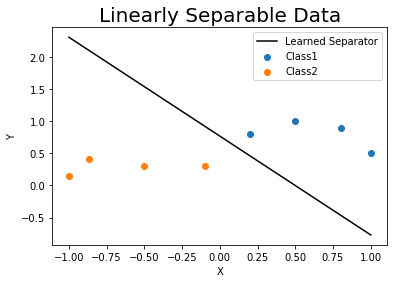

In [9]:
# Graph decision line

p1 = PerceptronClassifier(0.1, True, False, False)
scores = []
w = None
while True:
    
    x = p1.fit(X_temp1, y_temp1, w).predict(X_temp1)
    w = p1.weights
    score = pc.score(X_temp1, y_temp1)
    scores.append(score)
    if len(scores) <= 10:
        continue  
    if abs(scores[len(scores)-1] - scores[len(scores)-2]) < 0.01 and abs(scores[len(scores)-2] - scores[len(scores)-3]) < 0.01 and abs(scores[len(scores)-3] - scores[len(scores)-4]) < 0.01 and abs(scores[len(scores)-4] - scores[len(scores)-5]) < 0.01 and abs(scores[len(scores)-5] - scores[len(scores)-6]) < 0.01:
        break
    else:
        continue
        
w1, w2, b = p1.weights
temp_x1 =[]
temp_y1 = []
temp_x2 =[]
temp_y2 = []
for i,x in enumerate(X_temp1):
    if y_temp1[0][i] == 1:
        temp_x1.append(x[0])
        temp_y1.append(x[1])
    else:
        temp_x2.append(x[0])
        temp_y2.append(x[1])

x = -b / w1
y = -b / w2
d = y
c = -y /x
x_cor = np.array([-1,1])
y_cor = c* x_cor + d

plt.title("Linearly Separable Data", fontsize=20)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(temp_x1, temp_y1, label="Class1")
plt.scatter(temp_x2, temp_y2, label="Class2")
plt.plot(x_cor, y_cor, label="Learned Separator", color="black")
plt.legend()
plt.show()

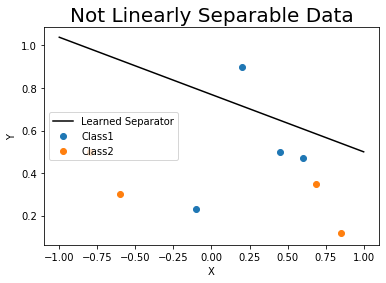

In [10]:
p2 = PerceptronClassifier(0.1, True, False, False)
scores = []
w = None
while True:
    
    x = p2.fit(X_temp2, y_temp2, w).predict(X_temp2)
    w = p2.weights
    score = pc.score(X_temp2, y_temp2)
    scores.append(score)
    if len(scores) <= 10:
        continue  
    if abs(scores[len(scores)-1] - scores[len(scores)-2]) < 0.01 and abs(scores[len(scores)-2] - scores[len(scores)-3]) < 0.01 and abs(scores[len(scores)-3] - scores[len(scores)-4]) < 0.01 and abs(scores[len(scores)-4] - scores[len(scores)-5]) < 0.01 and abs(scores[len(scores)-5] - scores[len(scores)-6]) < 0.01:
        break
    else:
        continue
        
w1, w2, b = p2.weights
temp_x1 =[]
temp_y1 = []
temp_x2 =[]
temp_y2 = []
for i,x in enumerate(X_temp2):
    if y_temp2[0][i] == 1:
        temp_x1.append(x[0])
        temp_y1.append(x[1])
    else:
        temp_x2.append(x[0])
        temp_y2.append(x[1])

x = -b / w1
y = -b / w2
d = y
c = -y /x
x_cor = np.array([-1,1])
y_cor = c* x_cor + d

plt.title("Not Linearly Separable Data", fontsize=20)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(temp_x1, temp_y1, label="Class1")
plt.scatter(temp_x2, temp_y2, label="Class2")
plt.plot(x_cor, y_cor, label="Learned Separator", color='black')
plt.legend(loc="center left")
plt.show()




In [11]:
d = arff.loadarff('voting-dataset.arff')
df_vote = pd.DataFrame(d[0])
str_df = df_vote.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()
df_vote = str_df
np_vote = np.array(df_vote)

np_vote[np_vote == 'n'] = 0
np_vote[np_vote == 'y'] = 1
np_vote[np_vote == 'republican'] = 1
np_vote[np_vote == 'democrat'] = 0
pc_vote = PerceptronClassifier(.1, True, True, False)

# 70 / 30
def trial():
    np.random.shuffle(np_vote)
    train_index = len(np_vote) * 7 // 10
    train_data = np_vote[:train_index,:]
    test_data = np_vote[train_index:,:]

    X_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    y_train = np.reshape(y_train, (1, y_train.shape[0]))

    X_test = test_data[:,:-1]
    y_test = test_data[:,-1]
    y_test = np.reshape(y_test, (1, y_test.shape[0]))

    #pc_vote = PerceptronClassifier(.1, True, True, False)

    w = None
    scores = []
    miss_rate = []
    while True:
        pc_vote.fit(X_train, y_train, w).predict(X_test)
        w = pc_vote.weights
        score = pc_vote.score(X_test, y_test)
        scores.append(score)
        miss_rate.append(1-score)
        if len(scores) <= 5:
            continue
        if abs(scores[len(scores)-1] - scores[len(scores)-2]) < 0.03 and abs(scores[len(scores)-2] - scores[len(scores)-3]) < 0.03 and abs(scores[len(scores)-3] - scores[len(scores)-4]) < 0.03 and abs(scores[len(scores)-4] - scores[len(scores)-5]) < 0.03 and abs(scores[len(scores)-5] - scores[len(scores)-6]) < 0.03:
            break
    return pc_vote.score(X_train,y_train), scores[-1], len(scores), miss_rate

t1 = trial()
t2 = trial()
t3 = trial()
t4 = trial()
t5 = trial()

In [12]:
from tabulate import tabulate

table = [["Trial", "Training Accuracy", "Test Accuracy", "Number of Epochs"], 
         ["trial 1", round(t1[0],2),round(t1[1],2),t1[2]],
         ["trial 2", round(t2[0],2),round(t2[1],2),t2[2]],
         ["trial 3", round(t3[0],2),round(t3[1],2),t3[2]],
         ["trial 4", round(t4[0],2),round(t4[1],2),t4[2]],
         ["trial 5", round(t5[0],2),round(t5[1],2),t5[2]],
         ["Average", round((t1[0]+t2[0]+t3[0]+t4[0]+t5[0])/5,2), round((t1[1]+t2[1]+t3[1]+t4[1]+t5[1])/5,2), (t1[2]+t2[2]+t3[2]+t4[2]+t5[2])//5]]
print(tabulate(table))

-------  -----------------  -------------  ----------------
Trial    Training Accuracy  Test Accuracy  Number of Epochs
trial 1  0.96               0.98           7
trial 2  0.97               0.93           20
trial 3  0.97               0.96           19
trial 4  0.97               0.92           6
trial 5  0.89               0.95           11
Average  0.95               0.95           12
-------  -----------------  -------------  ----------------


In [13]:
pc_vote.weights

array([-0.06584271150604776, -0.2672872759051148, -0.7373363022684625,
       1.6728670811841224, 0.7050407033618803, 0.0064867375911311365,
       0.39800389702485073, 0.7135187528363418, -0.6211953291035577,
       0.4854814039604949, -0.9201327184706894, 0.05888914863376077,
       -0.02443699134497443, 0.05599811355141315, -0.2353996671404823,
       0.7640636446834623, -1.0833479260370458], dtype=object)

In [14]:
print(np.where(pc_vote.weights == max(abs(pc_vote.weights))),min(abs(pc_vote.weights)))

(array([3], dtype=int64),) 0.0064867375911311365


In [15]:
df_vote.columns

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa', 'Class'],
      dtype='object')

Our model has learned to predict if someone will vote for democrat or republican, by being trained and adjusting the weights that correspond to each column features in the dataset.
By looking at the magnitude of the weights, we can see how individual features affected the result. 
We can see that the fourth weight has the largest magnitude of weight. So, 'physician-fee-freeze' feature was the most critical for the voting task.
Otherwise, there were several features of weights that are closest to zero depending on each trials. 'crime', 'superfund-right-to-sue', and 'education-spending' were some of the least critical features for the voting task.



In [16]:
temp = [len(t1[3]),len(t2[3]),len(t3[3]),len(t4[3]),len(t5[3])]

m = max(temp)
miss_t1 = np.array(t1[3])
miss_t2 = np.array(t2[3])
miss_t3 = np.array(t3[3])
miss_t4 = np.array(t4[3])
miss_t5 = np.array(t5[3])
miss_t1 = np.insert(miss_t1, len(miss_t1), np.zeros(m - len(miss_t1)))
miss_t2 = np.insert(miss_t2, len(miss_t2), np.zeros(m - len(miss_t2)))
miss_t3 = np.insert(miss_t3, len(miss_t3), np.zeros(m - len(miss_t3)))
miss_t4 = np.insert(miss_t4, len(miss_t4), np.zeros(m - len(miss_t4)))
miss_t5 = np.insert(miss_t5, len(miss_t5), np.zeros(m - len(miss_t5)))

miss_avg = (miss_t1+miss_t2+miss_t3+miss_t4+miss_t5)/5

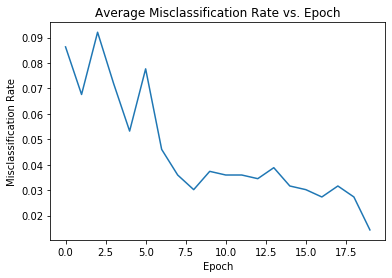

In [17]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()
    
plot_misclassification(miss_avg)

In [20]:
# Load sklearn perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import perceptron
from sklearn.metrics import accuracy_score

# Train on voting dataset
np_vote = np_vote.astype('int')
sklearn_result = []
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(np_vote[:,:-1], np_vote[:,-1], test_size=0.3)
    model = Perceptron(eta0=0.1, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    sklearn_result.append(round(accuracy_score(y_test, pred),2))
print("<Sklearn Perceptron score for the voting task>\n", sklearn_result)


<Sklearn Perceptron score for the voting task>
 [0.86, 0.93, 0.96, 0.95, 0.96]


In [21]:
# One other dataset
from sklearn import datasets

cancer_result = []
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['class'] = cancer_data.target
X = cancer_data.data
y = cancer_data.target
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    model = Perceptron(eta0=0.2, random_state=1, max_iter=500, early_stopping=True)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    cancer_result.append(round(accuracy_score(y_test, pred),2))
print("<Sklearn Perceptron score for the cancer>\n", cancer_result)

<Sklearn Perceptron score for the cancer>
 [0.9, 0.91, 0.95, 0.9, 0.54]


   For my perceptron, the accuracy score was from 92-97% mostly, but the score from sklearn.perceptron was in range of 93-97% typically. However, there are some times that the score from the skearn perceptron was about 88% or 89%, but it happened very rarely. I think both models predicted pretty similarly for the voting task.
   For another dataset, I used the breast cancer data from one of the sklearn's datasets. I tried some of parameters like max_iter and early_stopping. The results were not really good for certain trials. I think this is because there are so many features in this dataset and actually need another way to predict.

## Learn the Iris task (One vs One) 



In [22]:
# one vs one method

import urllib.request
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urllib.request.urlretrieve(URL, 'iris.data')
iris_data = pd.read_csv('iris.data', header=None)

In [23]:
# Split the df by class
setosa_df = iris_data.iloc[:50,:]
versicolor_df = iris_data.iloc[50:100,:]
virginica_df = iris_data.iloc[100:,:]

# train/test -> 70% / 30%
setosa_np = np.array(setosa_df)
versicolor_np = np.array(versicolor_df)
virginica_np = np.array(virginica_df)

setosa_train = setosa_np[:35,:]
setosa_test = setosa_np[35:,:]
versicolor_train = versicolor_np[:35,:]
versicolor_test = versicolor_np[35:,:]
virginica_train = virginica_np[:35,:]
virginica_test = virginica_np[35:,:]

test = np.concatenate((setosa_test, versicolor_test))
test = np.concatenate((test, virginica_test))
np.random.shuffle(test)
X_test = test[:,:-1]
y_test = test[:,-1]
y_test[y_test == 'Iris-setosa'] = 0
y_test[y_test == 'Iris-versicolor'] = 1
y_test[y_test == 'Iris-virginica'] = 2
y_test = np.reshape(y_test, (1, y_test.shape[0]))

# 1. setosa - versicolor
# setosa:0  versicolor:1
setosa_versicolor_data = np.concatenate((setosa_train, versicolor_train))
np.random.shuffle(setosa_versicolor_data)

# 2. setosa - virginica
# setosa:0  virginica:1
setosa_virginica_data = np.concatenate((setosa_train, virginica_train))
np.random.shuffle(setosa_virginica_data)

# 3. versicolor - virginica
# versicolor:0  virginica:1
versi_virginica_data = np.concatenate((versicolor_train, virginica_train))
np.random.shuffle(versi_virginica_data)

In [24]:
def trial2(pc, x, y, x_test, y_test):
    w = None
    scores = []
    
    while True:
        pred = pc.fit(x, y, w).predict(x_test)
        w = pc.weights
        score = pc.score(x_test, y_test)
        scores.append(score)
        if len(scores) <= 15:
            continue
        if abs(scores[len(scores)-1] - scores[len(scores)-2]) < 0.05 and abs(scores[len(scores)-2] - scores[len(scores)-3]) < 0.05 and abs(scores[len(scores)-3] - scores[len(scores)-4]) < 0.05 and abs(scores[len(scores)-4] - scores[len(scores)-5]) < 0.05 and abs(scores[len(scores)-5] - scores[len(scores)-6]) < 0.05:
            break
    return pred

In [25]:
## setosa:0  versicolor:1  virginica:2

# 1.
setosa_versicolor_data[setosa_versicolor_data == 'Iris-versicolor'] = 1
setosa_versicolor_data[setosa_versicolor_data == 'Iris-setosa'] = 0

setosa_versicolor_X_train = setosa_versicolor_data[:,:-1]
setosa_versicolor_y_train = setosa_versicolor_data[:,-1]
setosa_versicolor_y_train = np.reshape(setosa_versicolor_y_train, (1, setosa_versicolor_y_train.shape[0]))

pc_setosa_versicolor = PerceptronClassifier(0.1, True, True, False)
#pc_setosa_versicolor_prediction = pc_setosa_versicolor.fit(setosa_versicolor_X_train, setosa_versicolor_y_train).predict(X_test)

#pc_setosa_versicolor_prediction[pc_setosa_versicolor_prediction == 1] = 'Iris-versicolor'
#pc_setosa_versicolor_prediction[pc_setosa_versicolor_prediction == 0] = 'Iris-setosa'
pc_setosa_versicolor_prediction = trial2(pc_setosa_versicolor, setosa_versicolor_X_train, setosa_versicolor_y_train, X_test, y_test)
pc_setosa_versicolor_prediction

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.])

In [26]:
# 2.
setosa_virginica_data[setosa_virginica_data == 'Iris-setosa'] = 0
setosa_virginica_data[setosa_virginica_data == 'Iris-virginica'] = 1

setosa_virginica_X_train = setosa_virginica_data[:,:-1]
setosa_virginica_y_train = setosa_virginica_data[:,-1]
setosa_virginica_y_train = np.reshape(setosa_virginica_y_train, (1, setosa_virginica_y_train.shape[0]))

pc_setosa_virginica = PerceptronClassifier(0.1, True, True, False)
pc_setosa_virginica_prediction = trial2(pc_setosa_virginica, setosa_virginica_X_train, setosa_virginica_y_train, X_test, y_test)
pc_setosa_virginica_prediction[pc_setosa_virginica_prediction == 1] = 2
pc_setosa_virginica_prediction

array([2., 0., 2., 0., 2., 2., 0., 0., 2., 0., 2., 0., 2., 0., 2., 2., 2.,
       0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 0., 2., 2., 0., 0., 0., 2., 0., 2., 0.])

In [27]:
# 3.
versi_virginica_data[versi_virginica_data == 'Iris-versicolor'] = 0
versi_virginica_data[versi_virginica_data == 'Iris-virginica'] = 1

versi_virginica_X_train = versi_virginica_data[:,:-1]
versi_virginica_y_train = versi_virginica_data[:,-1]
versi_virginica_y_train = np.reshape(versi_virginica_y_train, (1, versi_virginica_y_train.shape[0]))

pc_versi_virginica = PerceptronClassifier(0.1, True, True, False)
pc_versi_virginica_prediction = trial2(pc_versi_virginica, versi_virginica_X_train, versi_virginica_y_train, X_test, y_test)
pc_versi_virginica_prediction[pc_versi_virginica_prediction == 1] = 2
pc_versi_virginica_prediction[pc_versi_virginica_prediction == 0] = 1
pc_versi_virginica_prediction

array([1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
       1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
# By major vote
# Combining results -> overall_result
overall_result = []
for num in zip(pc_setosa_versicolor_prediction, pc_setosa_virginica_prediction, pc_versi_virginica_prediction):
    unique, counts = np.unique(num, return_counts=True)
    #print(unique, counts)
    index = np.where(counts == np.max(counts))
    index = index[0][0]
    overall_result.append(unique[index])

In [29]:
# Get Accuracy Score for the test

corret_count = 0
for i in zip(overall_result, y_test[0]):
    if i[0] == i[1]:
        corret_count += 1
print("<Accuracy score>\n", corret_count / len(overall_result))

<Accuracy score>
 0.9777777777777777
